In [1]:
# Common parameters and imports
from optimal_entry import *
import scipy.io
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.axes_grid1.inset_locator import (inset_axes, InsetPosition)

Nsim = 20000
import pickle
ngfs_vars = pickle.load( open( "ngfs_variables_entry.p", "rb" ) )
monthly_params = scipy.io.loadmat('monthly_params.mat')
Phi = monthly_params['Phi'][:2,:2]
Sigma = monthly_params['Sigma'][:2,:2]
sigma_sig = np.sqrt(12)*float(monthly_params['sigmaGHG'])
R_C = 0.48
C_V = 19.34*1.1423 
C_F = 0 
W = 1000
R_U = 0.85

Selected scenarios:  ['Below 2°C', 'Current Policies', 'Delayed transition', 'Divergent Net Zero', 'NDCs', 'Net Zero 2050']


IntProgress(value=0, description='Simulation 0', max=960)

IntProgress(value=0, description='Revenues 0', max=81)

IntProgress(value=0, description='LS 0', max=80)

IntProgress(value=0, description='Simulation 1', max=960)

IntProgress(value=0, description='Revenues 1', max=81)

IntProgress(value=0, description='LS 1', max=80)

IntProgress(value=0, description='Simulation 2', max=960)

IntProgress(value=0, description='Revenues 2', max=81)

IntProgress(value=0, description='LS 2', max=80)

IntProgress(value=0, description='Simulation 3', max=960)

IntProgress(value=0, description='Revenues 3', max=81)

IntProgress(value=0, description='LS 3', max=80)

IntProgress(value=0, description='Simulation 4', max=960)

IntProgress(value=0, description='Revenues 4', max=81)

IntProgress(value=0, description='LS 4', max=80)

IntProgress(value=0, description='Simulation 5', max=960)

IntProgress(value=0, description='Revenues 5', max=81)

IntProgress(value=0, description='LS 5', max=80)

IntProgress(value=0, description='Simulation 6', max=960)

IntProgress(value=0, description='Revenues 6', max=81)

IntProgress(value=0, description='LS 6', max=80)

IntProgress(value=0, description='Simulation 7', max=960)

IntProgress(value=0, description='Revenues 7', max=81)

IntProgress(value=0, description='LS 7', max=80)

IntProgress(value=0, description='Simulation 8', max=960)

IntProgress(value=0, description='Revenues 8', max=81)

IntProgress(value=0, description='LS 8', max=80)

IntProgress(value=0, description='Simulation 9', max=960)

IntProgress(value=0, description='Revenues 9', max=81)

IntProgress(value=0, description='LS 9', max=80)

IntProgress(value=0, description='Simulation 10', max=960)

IntProgress(value=0, description='Revenues 10', max=81)

IntProgress(value=0, description='LS 10', max=80)

IntProgress(value=0, description='Simulation 11', max=960)

IntProgress(value=0, description='Revenues 11', max=81)

IntProgress(value=0, description='LS 11', max=80)

Calculation time:  94.41953492164612


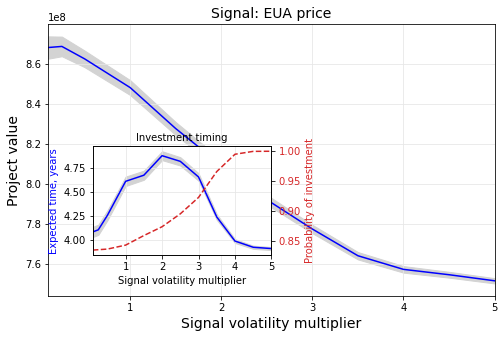

In [2]:
# Fig 8, left graph (sensitivity to signal volatility, signal = EUA price)
SS = [0,1,2,3,4,5] # selected scenarios
pi0 = np.ones(len(SS))/len(SS)
sigma_sig = np.sqrt(12)*0.3171393369736427 #monthly_params['sigmaCO2']
sig_fact = np.array([0.1, 0.25, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5])
sigma_fact = np.ones(len(sig_fact))
r = 0.03*np.ones(len(sig_fact))
rseed = 42
signal = "P_CO2"
price, ub, lb, mtau, utau, ltau, tau, I = simulate_entry(ngfs_vars,SS,signal,Nsim,rseed,r,
                                                         pi0,Phi,Sigma,sigma_fact,sig_fact*sigma_sig,W,R_U,R_C,C_F,C_V)


mtau,ltau,utau,ptau = calctaunan(tau,30)

fig, ax1 = plt.subplots(figsize=(8,5))
ax1.fill_between(sig_fact,lb,ub,color='lightgray')
ax1.plot(sig_fact,price,color='blue')
ax1.set_xlabel("Signal volatility multiplier",fontsize=14)
ax1.set_ylabel("Project value",fontsize=14)
ax1.set_xlim([sig_fact[0],sig_fact[-1]])
#ax1.set_ylim([7.3e8,8.7e8])
ax1.grid(axis='x', color='0.9')
ax1.grid(axis='y', color='0.9')
ax1.set_title('Signal: EUA price',fontsize=14)


ax2 = plt.axes([0,0,1,1])
ip = InsetPosition(ax1, [0.1,0.15,0.4,0.4])
ax2.set_axes_locator(ip)
ax2.fill_between(sig_fact,ltau,utau,color='lightgray')
ax2.plot(sig_fact,mtau,color='blue')
ax2.set_xlim([sig_fact[0],sig_fact[-1]])
ax2.grid(axis='x', color='0.9')
ax2.grid(axis='y', color='0.9')

ax2.set_title('Investment timing',fontsize=10)
ax2.set_xlabel("Signal volatility multiplier",fontsize=10)
ax2.set_ylabel("Expected time, years",fontsize=10,color='blue')

ax3 = ax2.twinx()  # instantiate a second axes that shares the same x-axis
ax3.set_axes_locator(ip)


color = 'tab:red'
ax3.set_ylabel('Probability of investment', color=color)  # we already handled the x-label with ax1
ax3.plot(sig_fact,ptau , '--',color=color)
ax3.tick_params(axis='y', labelcolor=color)

plt.savefig('entry_sigvol.pdf',format='pdf')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


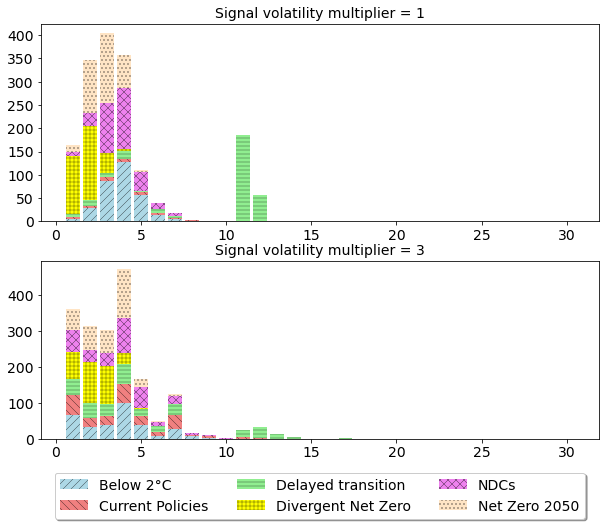

In [7]:
# Figure 9 (distribution of stopping times, signal = EUA)
list_tau = [tau[0,I==i] for i in range(6)]
htau1 = []
for eltau in list_tau:
    htau1.append(np.array([sum(eltau==i) for i in range(1,31)]))
list_tau = [tau[3,I==i] for i in range(6)]
htau2 = []
for eltau in list_tau:
    htau2.append(np.array([sum(eltau==i) for i in range(1,31)]))
list_tau = [tau[7,I==i] for i in range(6)]
htau3 = []
for eltau in list_tau:
    htau3.append(np.array([sum(eltau==i) for i in range(1,31)]))
scenarios =  ['Below 2°C', 'Current Policies', 'Delayed transition', 
                 'Divergent Net Zero', 'NDCs', 'Net Zero 2050']
#/ , \\ , | , - , + , x, o, O, ., *:
plt.figure(figsize=(10,8))

import matplotlib as mpl
mpl.rcParams['hatch.linewidth'] = 0.3
plt.subplot(211)
plt.bar(np.arange(1,31),htau2[0],label=scenarios[0],color='lightblue',hatch="///")
plt.bar(np.arange(1,31),htau2[1],bottom=htau2[0],label=scenarios[1],color='lightcoral',hatch="\\\\\\")
plt.bar(np.arange(1,31),htau2[2],bottom=htau2[0]+htau2[1],label=scenarios[2],color='lightgreen',hatch="---")
plt.bar(np.arange(1,31),htau2[3],bottom=htau2[0]+htau2[1]+htau2[2],label=scenarios[3],color='yellow',hatch="+++")
plt.bar(np.arange(1,31),htau2[4],bottom=htau2[0]+htau2[1]+htau2[2]+htau2[3],label=scenarios[4],color="violet",hatch="xxx")
plt.bar(np.arange(1,31),htau2[5],bottom=htau2[0]+htau2[1]+htau2[2]+htau2[3]+htau2[4],label=scenarios[5],color="bisque",hatch='...')
plt.title('Signal volatility multiplier = 1',fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.legend(fontsize=14)
ax = plt.subplot(212)
plt.bar(np.arange(1,31),htau3[0],label=scenarios[0],color='lightblue',hatch="///")
plt.bar(np.arange(1,31),htau3[1],bottom=htau3[0],label=scenarios[1],color='lightcoral',hatch="\\\\\\")
plt.bar(np.arange(1,31),htau3[2],bottom=htau3[0]+htau3[1],label=scenarios[2],color='lightgreen',hatch="---")
plt.bar(np.arange(1,31),htau3[3],bottom=htau3[0]+htau3[1]+htau3[2],label=scenarios[3],color='yellow',hatch="+++")
plt.bar(np.arange(1,31),htau3[4],bottom=htau3[0]+htau3[1]+htau3[2]+htau3[3],label=scenarios[4],color="violet",hatch="xxx")
plt.bar(np.arange(1,31),htau3[5],bottom=htau3[0]+htau3[1]+htau3[2]+htau3[3]+htau3[4],label=scenarios[5],color="bisque",hatch='...')
plt.title('Signal volatility multiplier = 3',fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])
# Put a legend below current axis
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=3,fontsize=14)
#plt.suptitle('Distribution of stopping times',fontsize=14)
plt.savefig('taufreq_entry.eps',format='eps')


Selected scenarios:  ['Below 2°C', 'Current Policies', 'Delayed transition', 'Divergent Net Zero', 'NDCs', 'Net Zero 2050']


IntProgress(value=0, description='Simulation 0', max=960)

IntProgress(value=0, description='Revenues 0', max=81)

IntProgress(value=0, description='LS 0', max=80)

IntProgress(value=0, description='Simulation 1', max=960)

IntProgress(value=0, description='Revenues 1', max=81)

IntProgress(value=0, description='LS 1', max=80)

IntProgress(value=0, description='Simulation 2', max=960)

IntProgress(value=0, description='Revenues 2', max=81)

IntProgress(value=0, description='LS 2', max=80)

IntProgress(value=0, description='Simulation 3', max=960)

IntProgress(value=0, description='Revenues 3', max=81)

IntProgress(value=0, description='LS 3', max=80)

IntProgress(value=0, description='Simulation 4', max=960)

IntProgress(value=0, description='Revenues 4', max=81)

IntProgress(value=0, description='LS 4', max=80)

IntProgress(value=0, description='Simulation 5', max=960)

IntProgress(value=0, description='Revenues 5', max=81)

IntProgress(value=0, description='LS 5', max=80)

IntProgress(value=0, description='Simulation 6', max=960)

IntProgress(value=0, description='Revenues 6', max=81)

IntProgress(value=0, description='LS 6', max=80)

IntProgress(value=0, description='Simulation 7', max=960)

IntProgress(value=0, description='Revenues 7', max=81)

IntProgress(value=0, description='LS 7', max=80)

IntProgress(value=0, description='Simulation 8', max=960)

IntProgress(value=0, description='Revenues 8', max=81)

IntProgress(value=0, description='LS 8', max=80)

IntProgress(value=0, description='Simulation 9', max=960)

IntProgress(value=0, description='Revenues 9', max=81)

IntProgress(value=0, description='LS 9', max=80)

IntProgress(value=0, description='Simulation 10', max=960)

IntProgress(value=0, description='Revenues 10', max=81)

IntProgress(value=0, description='LS 10', max=80)

IntProgress(value=0, description='Simulation 11', max=960)

IntProgress(value=0, description='Revenues 11', max=81)

IntProgress(value=0, description='LS 11', max=80)

Calculation time:  18.081156015396118


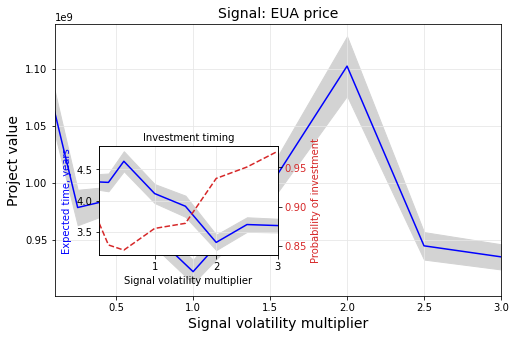

In [9]:
# Fig 8, left graph (sensitivity to signal volatility, signal = EUA price)
SS = [0,1,2,3,4,5] # selected scenarios
pi0 = np.ones(len(SS))/len(SS)
sigma_sig = np.sqrt(12)*float(monthly_params['sigmaGHG'])
sig_fact = np.array([0.1, 0.25, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5])
sigma_fact = np.ones(len(sig_fact))
r = 0.03*np.ones(len(sig_fact))
rseed = 42
signal = "emissions"
price, ub, lb, mtau, utau, ltau, tau, I = simulate_entry(ngfs_vars,SS,signal,Nsim,rseed,r,
                                                         pi0,Phi,Sigma,sigma_fact,sig_fact*sigma_sig,W,R_U,R_C,C_F,C_V)


mtau,ltau,utau,ptau = calctaunan(tau,30)

fig, ax1 = plt.subplots(figsize=(8,5))
ax1.fill_between(sig_fact,lb,ub,color='lightgray')
ax1.plot(sig_fact,price,color='blue')
ax1.set_xlabel("Signal volatility multiplier",fontsize=14)
ax1.set_ylabel("Project value",fontsize=14)
ax1.set_xlim([sig_fact[0],sig_fact[-1]])
#ax1.set_ylim([7.3e8,8.7e8])
ax1.grid(axis='x', color='0.9')
ax1.grid(axis='y', color='0.9')
ax1.set_title('Signal: EUA price',fontsize=14)


ax2 = plt.axes([0,0,1,1])
ip = InsetPosition(ax1, [0.1,0.15,0.4,0.4])
ax2.set_axes_locator(ip)
ax2.fill_between(sig_fact,ltau,utau,color='lightgray')
ax2.plot(sig_fact,mtau,color='blue')
ax2.set_xlim([sig_fact[0],sig_fact[-1]])
ax2.grid(axis='x', color='0.9')
ax2.grid(axis='y', color='0.9')

ax2.set_title('Investment timing',fontsize=10)
ax2.set_xlabel("Signal volatility multiplier",fontsize=10)
ax2.set_ylabel("Expected time, years",fontsize=10,color='blue')

ax3 = ax2.twinx()  # instantiate a second axes that shares the same x-axis
ax3.set_axes_locator(ip)


color = 'tab:red'
ax3.set_ylabel('Probability of investment', color=color)  # we already handled the x-label with ax1
ax3.plot(sig_fact,ptau , '--',color=color)
ax3.tick_params(axis='y', labelcolor=color)

plt.savefig('entry_sig_em_vol.pdf',format='pdf')

Selected scenarios:  ['Below 2°C', 'Current Policies', 'Delayed transition', 'Divergent Net Zero', 'NDCs', 'Net Zero 2050']


IntProgress(value=0, description='Simulation 0', max=960)

IntProgress(value=0, description='Revenues 0', max=81)

IntProgress(value=0, description='LS 0', max=80)

IntProgress(value=0, description='Simulation 1', max=960)

IntProgress(value=0, description='Revenues 1', max=81)

IntProgress(value=0, description='LS 1', max=80)

IntProgress(value=0, description='Simulation 2', max=960)

IntProgress(value=0, description='Revenues 2', max=81)

IntProgress(value=0, description='LS 2', max=80)

IntProgress(value=0, description='Simulation 3', max=960)

IntProgress(value=0, description='Revenues 3', max=81)

IntProgress(value=0, description='LS 3', max=80)

IntProgress(value=0, description='Simulation 4', max=960)

IntProgress(value=0, description='Revenues 4', max=81)

IntProgress(value=0, description='LS 4', max=80)

IntProgress(value=0, description='Simulation 5', max=960)

IntProgress(value=0, description='Revenues 5', max=81)

IntProgress(value=0, description='LS 5', max=80)

IntProgress(value=0, description='Simulation 6', max=960)

IntProgress(value=0, description='Revenues 6', max=81)

IntProgress(value=0, description='LS 6', max=80)

IntProgress(value=0, description='Simulation 7', max=960)

IntProgress(value=0, description='Revenues 7', max=81)

IntProgress(value=0, description='LS 7', max=80)

IntProgress(value=0, description='Simulation 8', max=960)

IntProgress(value=0, description='Revenues 8', max=81)

IntProgress(value=0, description='LS 8', max=80)

IntProgress(value=0, description='Simulation 9', max=960)

IntProgress(value=0, description='Revenues 9', max=81)

IntProgress(value=0, description='LS 9', max=80)

IntProgress(value=0, description='Simulation 10', max=960)

IntProgress(value=0, description='Revenues 10', max=81)

IntProgress(value=0, description='LS 10', max=80)

IntProgress(value=0, description='Simulation 11', max=960)

IntProgress(value=0, description='Revenues 11', max=81)

IntProgress(value=0, description='LS 11', max=80)

Calculation time:  18.029258966445923


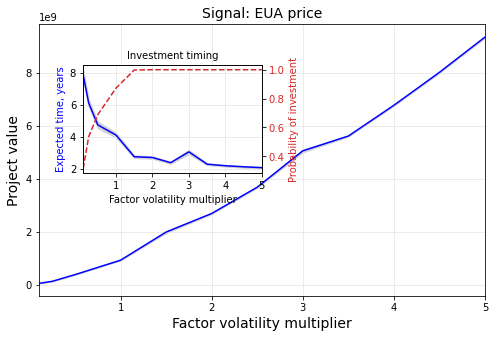

In [11]:
# Fig 10, left graph (sensitivity to risk factor volatility, signal = EUA price)
SS = [0,1,2,3,4,5] # selected scenarios
pi0 = np.ones(len(SS))/len(SS)
sigma_sig = np.sqrt(12)*float(monthly_params['sigmaGHG'])
sigma_fact = np.array([0.1, 0.25, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5])
sig_fact = np.ones(len(sigma_fact))

r = 0.03*np.ones(len(sig_fact))
rseed = 42
signal = "emissions"
price, ub, lb, mtau, utau, ltau, tau, I = simulate_entry(ngfs_vars,SS,signal,Nsim,rseed,r,
                                                         pi0,Phi,Sigma,sigma_fact,sig_fact*sigma_sig,W,R_U,R_C,C_F,C_V)


mtau,ltau,utau,ptau = calctaunan(tau,30)

fig, ax1 = plt.subplots(figsize=(8,5))
ax1.fill_between(sigma_fact,lb,ub,color='lightgray')
ax1.plot(sigma_fact,price,color='blue')
ax1.set_xlabel("Factor volatility multiplier",fontsize=14)
ax1.set_ylabel("Project value",fontsize=14)
ax1.set_xlim([sigma_fact[0],sigma_fact[-1]])
#ax1.set_ylim([7.3e8,8.7e8])
ax1.grid(axis='x', color='0.9')
ax1.grid(axis='y', color='0.9')


ax2 = plt.axes([0,0,1,1])
ip = InsetPosition(ax1, [0.1,0.45,0.4,0.4])
ax2.set_axes_locator(ip)
ax2.fill_between(sigma_fact,ltau,utau,color='lightgray')
ax2.plot(sigma_fact,mtau,color='blue')
ax2.set_xlim([sigma_fact[0],sigma_fact[-1]])
ax2.grid(axis='x', color='0.9')
ax2.grid(axis='y', color='0.9')

ax2.set_title('Investment timing',fontsize=10)
ax2.set_xlabel("Factor volatility multiplier",fontsize=10)
ax2.set_ylabel("Expected time, years",fontsize=10,color='blue')

ax3 = ax2.twinx()  # instantiate a second axes that shares the same x-axis
ax3.set_axes_locator(ip)


color = 'tab:red'
ax3.set_ylabel('Probability of investment', color=color)  # we already handled the x-label with ax1
ax3.plot(sigma_fact,ptau , '--',color=color)
ax3.tick_params(axis='y', labelcolor=color)

plt.savefig('entry_factvol.pdf',format='pdf')

Selected scenarios:  ['Below 2°C', 'Current Policies', 'Delayed transition', 'Divergent Net Zero', 'NDCs', 'Net Zero 2050']


IntProgress(value=0, description='Simulation 0', max=960)

IntProgress(value=0, description='Revenues 0', max=81)

IntProgress(value=0, description='LS 0', max=80)

IntProgress(value=0, description='Simulation 1', max=960)

IntProgress(value=0, description='Revenues 1', max=81)

IntProgress(value=0, description='LS 1', max=80)

IntProgress(value=0, description='Simulation 2', max=960)

IntProgress(value=0, description='Revenues 2', max=81)

IntProgress(value=0, description='LS 2', max=80)

IntProgress(value=0, description='Simulation 3', max=960)

IntProgress(value=0, description='Revenues 3', max=81)

IntProgress(value=0, description='LS 3', max=80)

IntProgress(value=0, description='Simulation 4', max=960)

IntProgress(value=0, description='Revenues 4', max=81)

IntProgress(value=0, description='LS 4', max=80)

IntProgress(value=0, description='Simulation 5', max=960)

IntProgress(value=0, description='Revenues 5', max=81)

IntProgress(value=0, description='LS 5', max=80)

IntProgress(value=0, description='Simulation 6', max=960)

IntProgress(value=0, description='Revenues 6', max=81)

IntProgress(value=0, description='LS 6', max=80)

Calculation time:  10.476930141448975


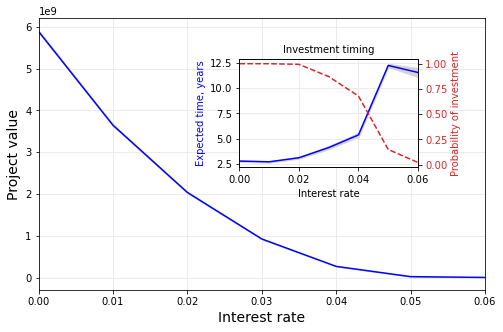

In [13]:
# Fig 10, left graph (sensitivity to interest rate, signal = EUA price)
SS = [0,1,2,3,4,5] # selected scenarios
pi0 = np.ones(len(SS))/len(SS)
r = np.linspace(0.,0.06,7)

sigma_sig = np.sqrt(12)*float(monthly_params['sigmaGHG'])
sigma_fact = np.ones(len(r))
sig_fact = np.ones(len(sigma_fact))

rseed = 42
signal = "emissions"
price, ub, lb, mtau, utau, ltau, tau, I = simulate_entry(ngfs_vars,SS,signal,Nsim,rseed,r,
                                                         pi0,Phi,Sigma,sigma_fact,sig_fact*sigma_sig,W,R_U,R_C,C_F,C_V)


mtau,ltau,utau,ptau = calctaunan(tau,30)

fig, ax1 = plt.subplots(figsize=(8,5))
ax1.fill_between(r,lb,ub,color='lightgray')
ax1.plot(r,price,color='blue')
ax1.set_xlabel("Interest rate",fontsize=14)
ax1.set_ylabel("Project value",fontsize=14)
ax1.set_xlim([r[0],r[-1]])
#ax1.set_ylim([7.3e8,8.7e8])
ax1.grid(axis='x', color='0.9')
ax1.grid(axis='y', color='0.9')


ax2 = plt.axes([0,0,1,1])
ip = InsetPosition(ax1, [0.45,0.45,0.4,0.4])
ax2.set_axes_locator(ip)
ax2.fill_between(r,ltau,utau,color='lightgray')
ax2.plot(r,mtau,color='blue')
ax2.set_xlim([r[0],r[-1]])
ax2.grid(axis='x', color='0.9')
ax2.grid(axis='y', color='0.9')

ax2.set_title('Investment timing',fontsize=10)
ax2.set_xlabel("Interest rate",fontsize=10)
ax2.set_ylabel("Expected time, years",fontsize=10,color='blue')

ax3 = ax2.twinx()  # instantiate a second axes that shares the same x-axis
ax3.set_axes_locator(ip)


color = 'tab:red'
ax3.set_ylabel('Probability of investment', color=color)  # we already handled the x-label with ax1
ax3.plot(r,ptau , '--',color=color)
ax3.tick_params(axis='y', labelcolor=color)

plt.savefig('entry_r.pdf',format='pdf')

In [22]:
# Table 4

SS = [0,1,2,3,4,5] # selected scenarios
pi0 = np.ones(1)

r = 0.03*np.ones(1)
sigma_fact = np.ones(len(r))
sig_fact = np.ones(len(r))
rseed = 42
signal = "P_CO2"

for i in range(6):
    price, ub, lb, mtau, utau, ltau, tau, I = simulate_entry(ngfs_vars,SS[i:i+1],signal,Nsim,rseed,r,
                                                             pi0,Phi,Sigma,sigma_fact,sig_fact*sigma_sig,W,R_U,R_C,C_F,C_V)
    
    print('Price : ', float(price),', exit time : ',float(mtau),'\n')

    


Selected scenarios:  ['Below 2°C']


IntProgress(value=0, description='Simulation 0', max=960)

IntProgress(value=0, description='Revenues 0', max=81)

IntProgress(value=0, description='LS 0', max=80)

Calculation time:  2.8952369689941406
Price :  756140344.4150277 , exit time :  3.10905 

Selected scenarios:  ['Current Policies']


IntProgress(value=0, description='Simulation 0', max=960)

IntProgress(value=0, description='Revenues 0', max=81)

IntProgress(value=0, description='LS 0', max=80)

Calculation time:  2.8399579524993896
Price :  0.0 , exit time :  31.0 

Selected scenarios:  ['Delayed transition']


IntProgress(value=0, description='Simulation 0', max=960)

IntProgress(value=0, description='Revenues 0', max=81)

IntProgress(value=0, description='LS 0', max=80)

Calculation time:  2.8307509422302246
Price :  1819714319.6323926 , exit time :  6.05465 

Selected scenarios:  ['Divergent Net Zero']


IntProgress(value=0, description='Simulation 0', max=960)

IntProgress(value=0, description='Revenues 0', max=81)

IntProgress(value=0, description='LS 0', max=80)

Calculation time:  2.8281302452087402
Price :  1461670581.1948633 , exit time :  1.9728 

Selected scenarios:  ['NDCs']


IntProgress(value=0, description='Simulation 0', max=960)

IntProgress(value=0, description='Revenues 0', max=81)

IntProgress(value=0, description='LS 0', max=80)

Calculation time:  2.8338778018951416
Price :  185935864.3306515 , exit time :  3.0346 

Selected scenarios:  ['Net Zero 2050']


IntProgress(value=0, description='Simulation 0', max=960)

IntProgress(value=0, description='Revenues 0', max=81)

IntProgress(value=0, description='LS 0', max=80)

Calculation time:  2.8671891689300537
Price :  1401351512.3164577 , exit time :  1.3478 

